<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/TAREA%205/2-3-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#minimos cuadrados

def GetFit(x,y,n):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  sol = np.linalg.solve(AT,bT)

  return sol

In [ ]:
#Grado del modelo
def GetModel(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

Realice  el  ajuste  usando  el  m ́etodo  de  m ́ınimos  cuadrados  paraencontrar los par ́ametros de:
f(x) =a0+a1x

Grafique los datos y el ajuste mostrando el valor de las constantes en la etiqueta de lagrafica.

In [187]:
url = "https://raw.githubusercontent.com/asegura4488/Database/refs/heads/main/MetodosComputacionalesReforma/MinimosLineal.txt"
datos = pd.read_csv(url, sep=" ")
datos.columns = ['x','y']
print(datos.head())

x1 = np.array(datos["x"])
y1 = np.array(datos["y"])



          x         y
0  1.052632 -4.065870
1  2.105263  0.179649
2  3.157895  2.719807
3  4.210526  2.878523
4  5.263158  4.527426


In [188]:
print(x1,y1)

[ 1.052632  2.105263  3.157895  4.210526  5.263158  6.315789  7.368421
  8.421053  9.473684 10.52632  11.57895  12.63158  13.68421  14.73684
 15.78947  16.84211  17.89474  18.94737  20.      ] [-4.06587    0.1796494  2.719807   2.878523   4.527426   8.827734
 10.97722   11.79944   14.52931   17.22463   21.0981    20.79109
 26.08018   26.00302   30.14533   29.14247   33.28434   34.50524
 36.56262  ]


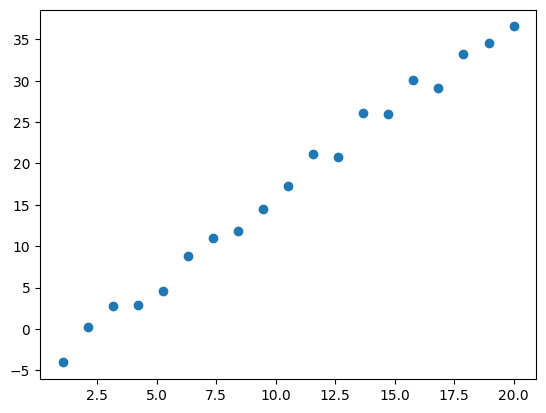

In [189]:
plt.scatter(x1,y1)

In [190]:
#Lineal
n=1
xn = GetFit(x1,y1,n=n)
xn

array([-5.20732249,  2.13074682])

In [191]:
xi = np.linspace(np.min(x1),np.max(x1),50)
yi = GetModel(xi,xn)
yi

array([-2.96443021, -2.14051094, -1.31659168, -0.49267241,  0.33124686,
        1.15516612,  1.97908539,  2.80300466,  3.62692392,  4.45084319,
        5.27476245,  6.09868172,  6.92260099,  7.74652025,  8.57043952,
        9.39435879, 10.21827805, 11.04219732, 11.86611658, 12.69003585,
       13.51395512, 14.33787438, 15.16179365, 15.98571292, 16.80963218,
       17.63355145, 18.45747071, 19.28138998, 20.10530925, 20.92922851,
       21.75314778, 22.57706705, 23.40098631, 24.22490558, 25.04882484,
       25.87274411, 26.69666338, 27.52058264, 28.34450191, 29.16842118,
       29.99234044, 30.81625971, 31.64017897, 32.46409824, 33.28801751,
       34.11193677, 34.93585604, 35.75977531, 36.58369457, 37.40761384])

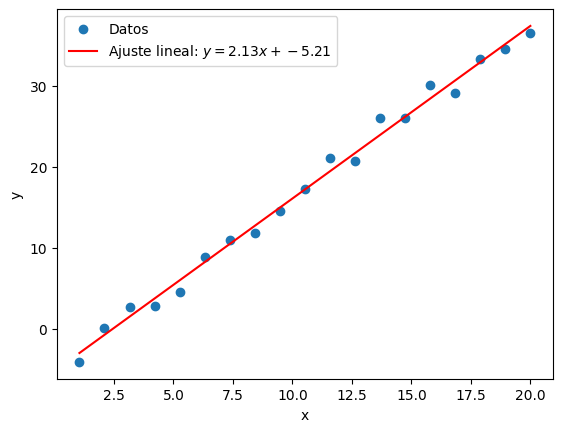

In [193]:
plt.scatter(x1,y1,label="Datos")
plt.plot(xi,yi,color="red", label = f"Ajuste lineal: $y={xn[1]:.2f}x+{xn[0]:.2f}$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Realice el ajuste usando el m ́etodo de m ́ınimos cuadrados paraencontrar los par ́ametros de:
f(x) =a0+a1x+a1x2(9.26)

Grafique los datos y el ajuste mostrando el valor de las constantes en la etiqueta de lagrafica.


In [200]:
datos = "https://raw.githubusercontent.com/asegura4488/Database/refs/heads/main/MetodosComputacionalesReforma/MinimosCuadratico.txt"
datos = pd.read_csv(datos, sep=" ")
datos.columns = ['x','y']
print(datos.head())

x2 = np.array(datos["x"])
y2 = np.array(datos["y"])

          x         y
0  0.526316  10.77900
1  1.052632  13.12721
2  1.578947  21.20879
3  2.105263  20.63223
4  2.631579  34.11089


Text(0.5, 1.0, 'Datos')

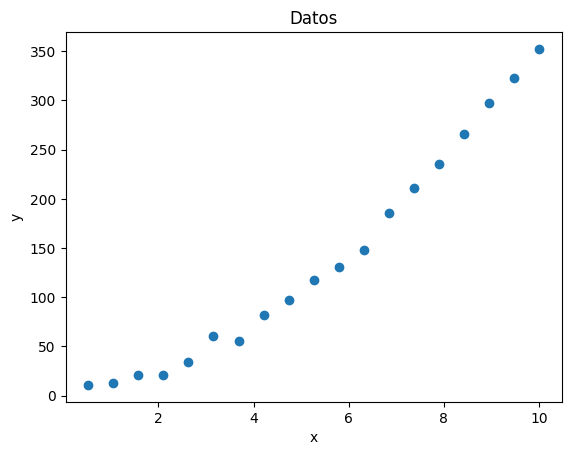

In [201]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos")

In [202]:
#cuadrático
n=2
xn2 = GetFit(x,y,n=n)
xn2

array([3.91439388, 5.04229284, 3.04171871])

In [203]:
xi2 = np.linspace(np.min(x),np.max(x),50)
yi2 = GetModel(xi2,xn2)

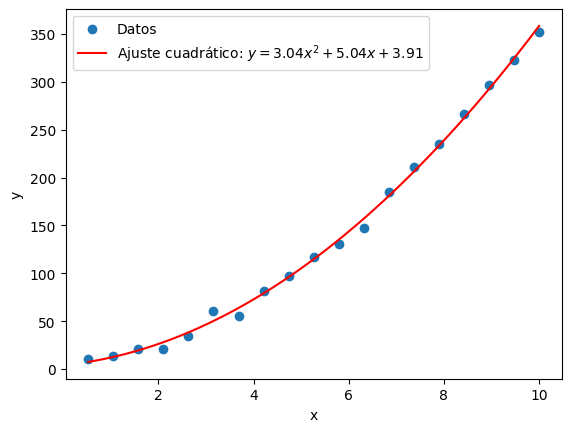

In [206]:
plt.scatter(x,y, label = "Datos")
plt.plot(xi2,yi2,color="red", label = f"Ajuste cuadrático: $y={xn2[2]:.2f}x^2+{xn2[1]:.2f}x+{xn2[0]:.2f}$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Curve_fit

In [ ]:
#Lineal
from scipy.optimize import curve_fit
def LinealModel(x,a,b):
    return a*x + b
AjusteLineal = curve_fit(LinealModel, x1, y1)
AjusteLineal

(array([ 2.13074682, -5.20732248]),
 array([[ 0.00211668, -0.02228081],
        [-0.02228081,  0.30489536]]))

In [211]:
#Cudrática
def QModel(x,a,b,c):
    return a*x**2 + b*x + c
AjusteCuadratico = curve_fit(QModel, x2, y2)
AjusteCuadratico

(array([3.04171866, 5.04229335, 3.91439272]),
 array([[ 0.03124008, -0.32884298,  0.60576344],
        [-0.32884298,  3.66746457, -7.4604543 ],
        [ 0.60576344, -7.4604543 , 19.16292792]]))

In [212]:
xi = np.linspace(np.min(x2), np.max(x2), 50)
yi = QModel(xi, a, b,c)

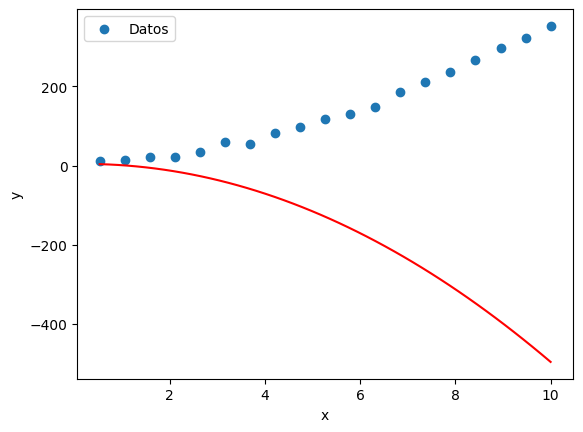

In [213]:
plt.scatter(x2,y2, label = "Datos")
plt.plot(xi,yi,color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()